In [1]:
import os
#os.chdir("./drive/MyDrive/Imperial/SOMAS/Experiments")
#os.chdir("./Experiments")
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#os.getcwd()

# Read from CSV

In [2]:
#using death.json file
def lives_vs_daysSurvived(fileName, team):
  if not isinstance(team,str):
    print("Error: Team variable should be a string!")

  dataFrame = pd.read_json(fileName, lines = True)
  teamData = dataFrame[dataFrame["agent_type"].str.contains(team)] #extract data for a certain team
  ages = teamData["ageUponDeath"].values #convert into numpy
  #ages = teamData["Age"].values #convert into numpy
  deaths = np.arange(len(ages)) + 1
  return deaths, ages 

#using .csv file
def cumulativeRewards(fileName):
  data = pd.read_csv(fileName).to_numpy()
  day = np.arange(data.size) + 1
  return day, data

#using death.json file
def days_vs_deathPerDay(fileName, simulation_days):
  dataFrame = pd.read_json(fileName, lines = True)
  day = np.arange(simulation_days) + 1
  deathPerDay = np.zeros(simulation_days)

  value_count = dataFrame["ageUponDeath"].value_counts()
  for n in range(simulation_days):
    if n+1 in value_count:
      deathPerDay[n] = value_count[n+1]
  
  return day, deathPerDay

In [ ]:
#plot lives vs days survived
fileName = "analyses/exp_cumulative_rewardslogs2022-01-07-22-06-27.json"
team = "Team6"
lives, days_survived = lives_vs_daysSurvived(fileName, team)
print(len(lives))

plt.bar(lives, days_survived, tick_label = lives)
#plt.plot(lives, days_survived, color = 'red')
#plt.scatter(lives, days_survived, color = 'red')
plt.xlabel("Deaths")
plt.ylabel("Days lived")
plt.title("Deaths vs Days lived")

In [ ]:
#Days vs death per day
day, deathPerDay = days_vs_deathPerDay(fileName, 10000)
#x = day[range(0,200,10)]
#y = deathPerDay[range(0,200,10)]

plt.bar(day,deathPerDay)
plt.xlabel("Days")
plt.ylabel("Death Per Day")
plt.title("Days vs Death per day")

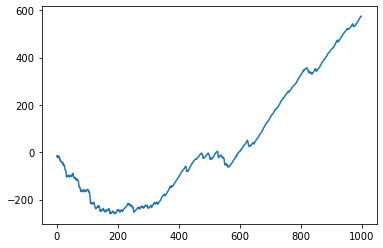

In [8]:
#cumulative rewards
fileName = "logs/2022-01-09-16-52-20/cumulative_rewards_a0dbc73d-9170-4e73-9e54-206daf077095.csv"
day, data = cumulativeRewards(fileName)
#print(day)
#print(data)
plt.plot(day,data)

# Read from json

In [7]:
t2 = pd.read_json("analyses/2022-01-07-11-51-31/main.json", lines = True)

print(t2.columns)

Index(['level', 'msg', 'reporter', 'time', 'type',
       'Number of new agents created: ', 'agent_id', 'new_floor', 'old_floor',
       'Current Simulation Tick', 'floor', 'food_left', 'agent_type', 'aggr',
       'greed', 'hp', 'kind', 'mood', 'morality', 'health', 'message',
       'receiver floor', 'request amount', 'sender floor', 'msgType',
       'senderFloor', 'targetFloor', 'bType', 'foodTaken', 'amount',
       'messageType', 'DaysToWait', 'FoodToEat', 'foodEaten', 'Mood',
       'Morality', 'response', 'statement', 'memory', 'food', 'global_trust',
       'daysHungry', 'sender_uuid', 'sentmessage_uuid', 'state',
       'selected and performed action', 'agentType', 'daysLived',
       'sentMsg_Type', 'Food_on_our_level', 'Request_amt',
       'Agent Type and number that died', 'agentAge', 'agentID'],
      dtype='object')


In [ ]:
import json
line_list = []
with open('analyses/2022-01-07-11-07-15/main.json') as f:
    for line in f:
        a_dict = json.loads(line)
        df = pd.DataFrame(a_dict).T
        line_list.append(df)

df = pd.concat(line_list)

In [11]:
#t_all = pd.read_json("analyses/2022-01-05-21-16-45/main.json", lines = True)
#t_all = t2.loc[t2["agentType"] == "Team2"]
#t_all.head()
t_all = t2.loc[t2['msg'] == "Killing agent"]
#t_all = t_all.loc[t_all['agent_type'] == "Team2"]
t_all

,level,msg,reporter,time,type,Number of new agents created:,agent_id,new_floor,old_floor,Current Simulation Tick,...,state,selected and performed action,agentType,daysLived,sentMsg_Type,Food_on_our_level,Request_amt,Agent Type and number that died,agentAge,agentID
31637,info,Killing agent,agent,2022-01-07T11:51:32Z,NaN,NaN,8e9d9719-81a3-4c8a-a1aa-9658eb3a5df8,NaN,NaN,NaN,...,NaN,NaN,7,9.0,NaN,NaN,NaN,NaN,NaN,NaN
31639,info,Killing agent,agent,2022-01-07T11:51:32Z,NaN,NaN,396d42cd-31b0-4bb6-ac92-e0e8c50e3f9c,NaN,NaN,NaN,...,NaN,NaN,8,9.0,NaN,NaN,NaN,NaN,NaN,NaN
63224,info,Killing agent,agent,2022-01-07T11:51:32Z,NaN,NaN,396d42cd-31b0-4bb6-ac92-e0e8c50e3f9c,NaN,NaN,NaN,...,NaN,NaN,8,9.0,NaN,NaN,NaN,NaN,NaN,NaN
82106,info,Killing agent,agent,2022-01-07T11:51:33Z,NaN,NaN,2d689674-63a7-4255-82fe-5cf17ca32eb2,NaN,NaN,NaN,...,NaN,NaN,8,25.0,NaN,NaN,NaN,NaN,NaN,NaN
100970,info,Killing agent,agent,2022-01-07T11:51:33Z,NaN,NaN,396d42cd-31b0-4bb6-ac92-e0e8c50e3f9c,NaN,NaN,NaN,...,NaN,NaN,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063100,info,Killing agent,agent,2022-01-07T11:52:43Z,NaN,NaN,3a768563-a46f-4e05-9ff1-0dee36d182fc,NaN,NaN,NaN,...,NaN,NaN,5,161.0,NaN,NaN,NaN,NaN,NaN,NaN
3066201,info,Killing agent,agent,2022-01-07T11:52:43Z,NaN,NaN,8e9d9719-81a3-4c8a-a1aa-9658eb3a5df8,NaN,NaN,NaN,...,NaN,NaN,7,12.0,NaN,NaN,NaN,NaN,NaN,NaN
3066208,info,Killing agent,agent,2022-01-07T11:52:43Z,NaN,NaN,870a86c5-0dc1-478d-bfd7-e2fe96f86ff0,NaN,NaN,NaN,...,NaN,NaN,5,35.0,NaN,NaN,NaN,NaN,NaN,NaN
3078617,info,Killing agent,agent,2022-01-07T11:52:44Z,NaN,NaN,2782de44-3c9a-4e87-80a6-c44998dc7253,NaN,NaN,NaN,...,NaN,NaN,7,49.0,NaN,NaN,NaN,NaN,NaN,NaN


1st graph

IndexError: index 0 is out of bounds for axis 0 with size 0

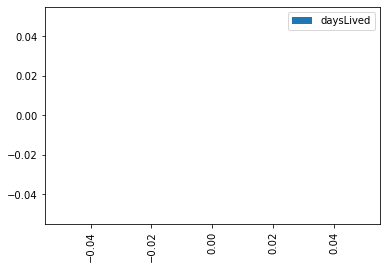

In [9]:
plotdata = pd.DataFrame(t_all, columns = ['daysLived'])
#plotdata = t_all[['agent_type','daysLived']]
#plotdata
plotdata.reset_index(inplace=True)
plotdata = pd.DataFrame(plotdata, columns = ['daysLived'])
plotdata.plot(kind='bar')

2nd Graph All agent - death at daysLived = x

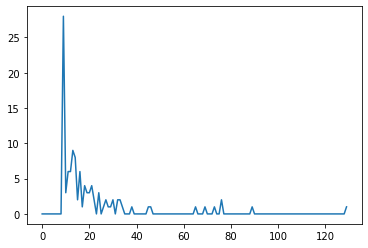

In [ ]:
P2 = t2.loc[t2['msg'] == "Killing agent"]
plotdata = pd.DataFrame(P2, columns = ['agent_type','daysLived'])
#indexedData = plotdata.set_index('daysLived')
#indexedData.sort_index(ascending=True)
#indexedData.plot(kind='bar')
SumArray = [0]* (int(max(plotdata['daysLived']))+1)
for index, row in plotdata.iterrows():
    #print(row['daysLived'])
    SumArray[int(row['daysLived'])] = SumArray[int(row['daysLived'])] + 1
plt.plot(SumArray)

3rd Graph 

IndexError: index 0 is out of bounds for axis 0 with size 0

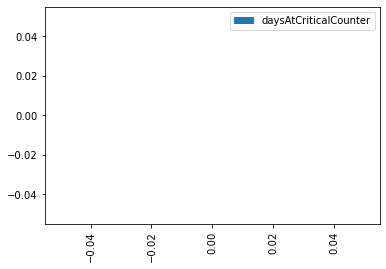

In [12]:
t_all = t2.loc[t2['msg'] == "Agent team2 at critical state"]
#t_all = t_all.loc[t_all['agent_type'] == "Team2"]
plotdata = pd.DataFrame(t_all, columns = ['agent_id','daysAtCriticalCounter'])
#plotdata = t_all[['agent_type','daysLived']]
#plotdata
#plotdata.set_index('agent_id')
#plotdata.groupby('agent_id', sort = False).max()
#plotdata.iloc[plotdata.groupby('agent_id').apply(lambda x: x['daysAtCriticalCounter'].idxmax())]
#plotdata.groupby(['agent_id'], sort=False)['daysAtCriticalCounter'].max()
idx = plotdata.groupby(['agent_id'])['daysAtCriticalCounter'].transform(max) == plotdata['daysAtCriticalCounter']
#df[idx]
"""
plotdata.reset_index(inplace=True)
plotdata = pd.DataFrame(plotdata, columns = ['daysLived'])
plotdata.plot(kind='bar')
"""
PD = plotdata[idx]
PD.plot(kind='bar')

In [9]:
# Use death instead
td = pd.read_json("logs/2022-01-09-16-52-20/death.json", lines = True)

print(td.columns)

Index(['ageUponDeath', 'agent_type', 'cumulativeDeaths', 'day', 'level', 'msg',
       'tick', 'time'],
      dtype='object')


4th graph - Lived day vs average day live for an agent

In [10]:
t_all = td.loc[td['agent_type'] == "Team2"]
#t_all = t_all.loc[t_all['agent_type'] == "Team2"]
t_all

,ageUponDeath,agent_type,cumulativeDeaths,day,level,msg,tick,time
36,109,Team2,37,111,info,,15400,2022-01-09T16:52:35Z
71,211,Team2,72,213,info,,29680,2022-01-09T16:52:48Z


<AxesSubplot:>

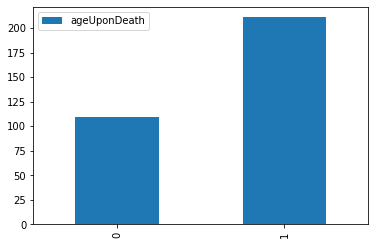

In [11]:
plotdata = pd.DataFrame(t_all, columns = ['ageUponDeath'])
plotdata.reset_index(inplace=True)
plotdata = pd.DataFrame(plotdata, columns = ['ageUponDeath'])
plotdata.plot(kind='bar')

<AxesSubplot:>

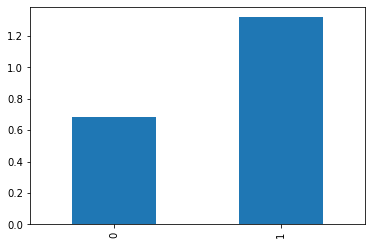

In [12]:
plotdata = pd.DataFrame(t_all, columns = ['ageUponDeath'])
plotdata.reset_index(inplace=True)
plotdata = pd.DataFrame(plotdata, columns = ['ageUponDeath'])
mean_day_lived = plotdata['ageUponDeath'].mean()
plotdata = plotdata['ageUponDeath']/mean_day_lived
plotdata.plot(x='index',kind='bar')

<AxesSubplot:xlabel='agent_type'>

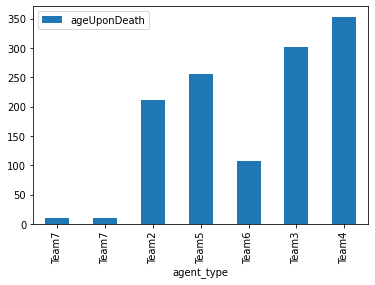

In [13]:
# max survive days over each agent
t_all = td
plotdata = pd.DataFrame(t_all, columns = ['agent_type','ageUponDeath'])
idx = plotdata.groupby(['agent_type'])['ageUponDeath'].transform(max) == plotdata['ageUponDeath']
PD = plotdata[idx]
PD.plot(x='agent_type',kind='bar')

<AxesSubplot:xlabel='agent_type'>

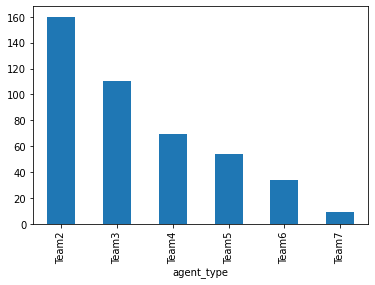

In [14]:
# mean day survive per agent
t_all = td
plotdata = pd.DataFrame(t_all, columns = ['agent_type','ageUponDeath'])
A_sorted = plotdata.sort_values(["agent_type"], ascending=True)
A_sorted = A_sorted.groupby(['agent_type'])['ageUponDeath'].mean()
#PD = plotdata[idx]
#plotdata
A_sorted.plot(x='agent_type',kind='bar')